**PROJECT TITLE**- Integrated Retail Analytics for Store optimization

**CONTRIBUTION-** Individual

**PROJECT SUMMARY**- This project aims to optimize retail store performance by leveraging data-driven insights and machine learning techniques. It focuses on forecasting sales, identifying sales anomalies, analyzing customer segments, and developing personalized marketing and inventory management strategies for enhanced customer experience and operational efficiency.



TOOLS AND TECHNIQUES-

Machine Learning Models: Regression models (XGBoost, ARIMA), Clustering (K-Means, DBSCAN), Anomaly Detection (Isolation Forest, Statistical Thresholding)

Data Analysis: EDA, Correlation Analysis, Time-Series Decomposition

Visualization: Matplotlib, Seaborn, Plotly

Libraries: Pandas, NumPy, Scikit-learn, Statsmodels

**GITHUB LINK:-**
https://github.com/Shreya21-2003/Integrated-Retail-Analytics-for-Store-optimization.git

**IMPORT LIBRARIES**

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import silhouette_score


**LOADING THE DATASET**

In [3]:
sales = pd.read_csv('/content/sales data-set.csv')
features = pd.read_csv('/content/Features data set.csv')
stores = pd.read_csv('/content/stores data-set.csv')
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)
data = sales.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')
data = data.merge(stores, on='Store', how='left')
print(data.head())


   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  

**DATA PREPROCESSING AND FEATURE ENGINEERING**

In [4]:
# Handle missing values
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    data[col] = data[col].fillna(0)

# Create additional features
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['IsHoliday'] = data['IsHoliday'].astype(int)

# Sales per sqft
data['Sales_per_SqFt'] = data['Weekly_Sales'] / data['Size']


**ANOMALY DETECTION IN SALES DATA**

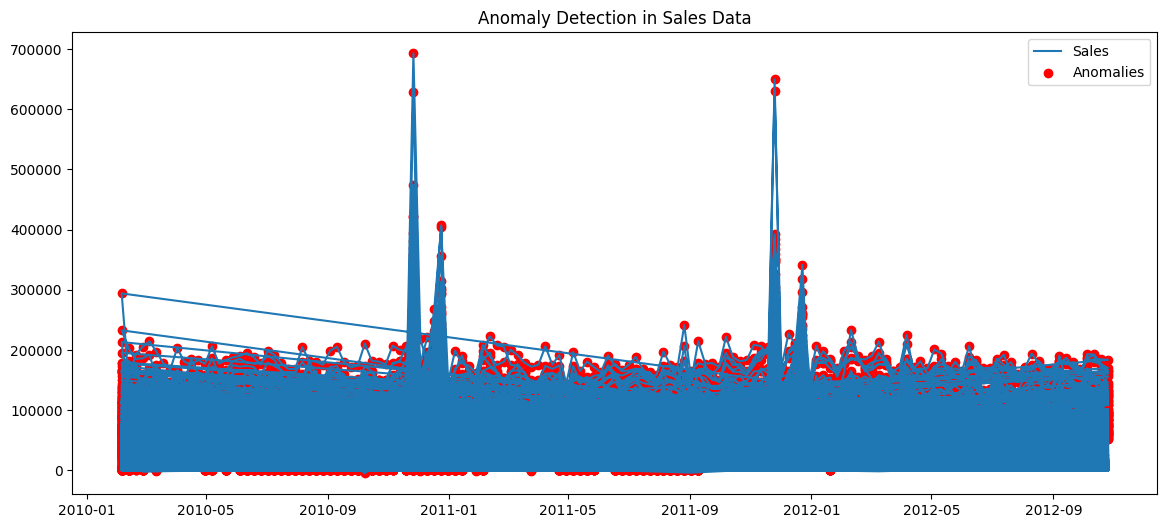

In [5]:
features_for_anomaly = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = data[features_for_anomaly].fillna(0)

model = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = model.fit_predict(X)

# Visualize anomalies
anomalies = data[data['anomaly'] == -1]

plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Weekly_Sales'], label='Sales')
plt.scatter(anomalies['Date'], anomalies['Weekly_Sales'], color='red', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection in Sales Data")
plt.show()


**Time-Based Anomaly Detection**

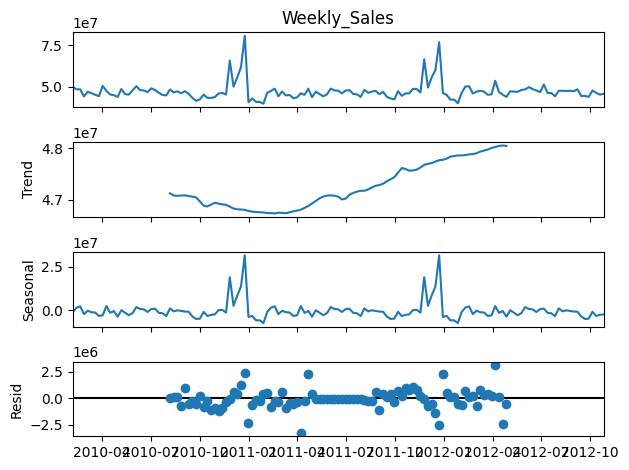

In [6]:
# Aggregate sales per week
ts = data.groupby('Date')['Weekly_Sales'].sum()

# Decompose time series
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=52)
decomposition.plot()
plt.show()


**Customer Segmentation**

In [7]:
# Aggregate data by Store
store_summary = data.groupby('Store')[['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'CPI', 'Unemployment', 'Size']].mean().fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(store_summary)

kmeans = KMeans(n_clusters=3, random_state=42)
store_summary['Segment'] = kmeans.fit_predict(X_scaled)

print(store_summary.head())


       Weekly_Sales    MarkDown1    MarkDown2         CPI  Unemployment  \
Store                                                                     
1      21710.543621  2886.877467   873.291894  215.995525      7.610918   
2      26898.070031  3815.003642  1571.495877  215.651869      7.623279   
3       6373.033983  1104.843804   294.276057  219.402843      7.175602   
4      29161.210415  3352.829782  1381.076520  128.680070      5.965849   
5       5053.415813  1079.143440   300.162839  216.576516      6.296549   

           Size  Segment  
Store                     
1      151315.0        2  
2      202307.0        2  
3       37392.0        1  
4      205863.0        2  
5       34875.0        1  


**Market Basket Analysis**

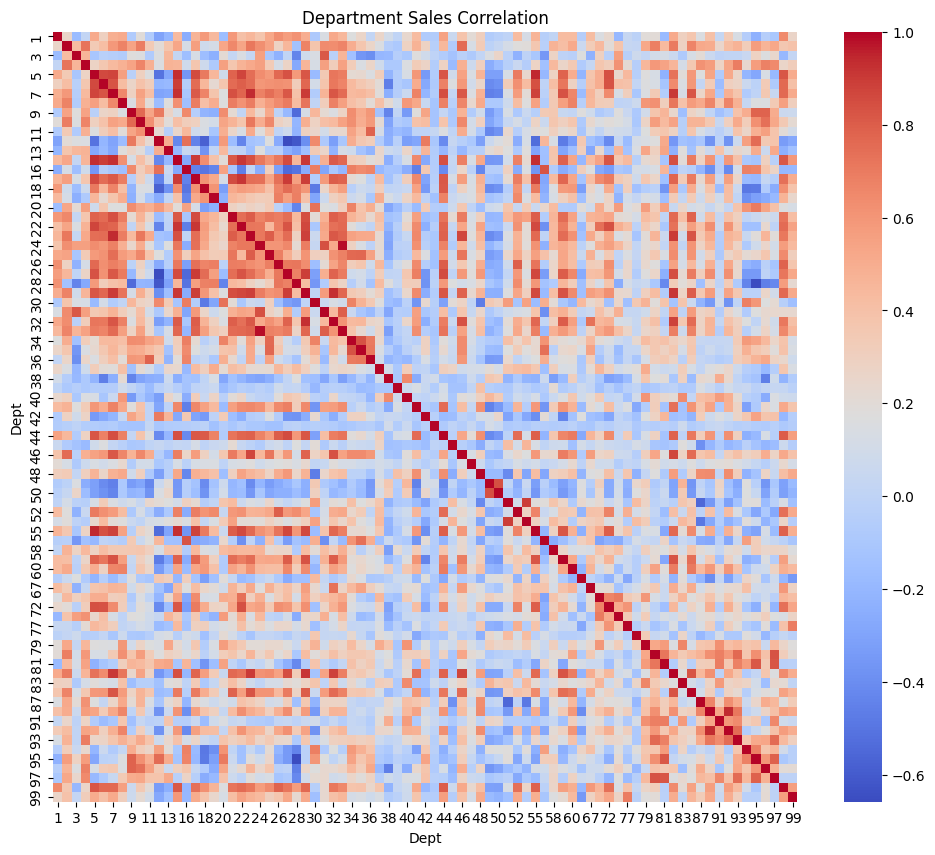

In [8]:
# Create pivot table by Date and Dept
dept_sales = data.pivot_table(index='Date', columns='Dept', values='Weekly_Sales', aggfunc='sum').fillna(0)

# Correlation matrix as proxy for associations
correlation = dept_sales.corr()

# Visualize correlations
plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap='coolwarm')
plt.title("Department Sales Correlation")
plt.show()


**Demand Forecasting**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


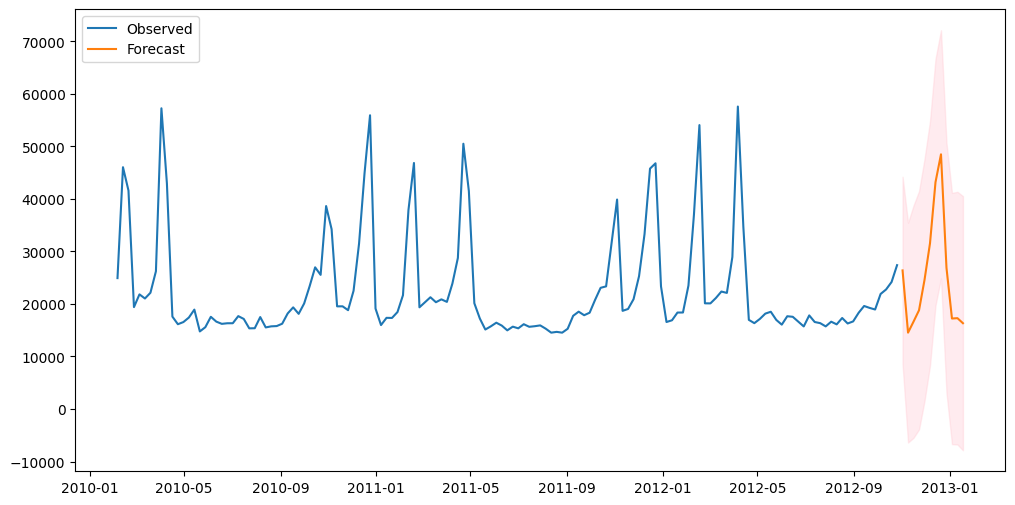

In [9]:
# Forecast for a specific Store-Dept
subset = data[(data['Store'] == 1) & (data['Dept'] == 1)].set_index('Date').sort_index()
ts = subset['Weekly_Sales']

exog = subset[['CPI', 'Fuel_Price', 'Unemployment']]

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,52), exog=exog)
result = model.fit()

forecast = result.get_forecast(steps=12, exog=exog.tail(12))
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(ts, label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:,0], forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.legend()
plt.show()


**IMPACT OF FACTORS**

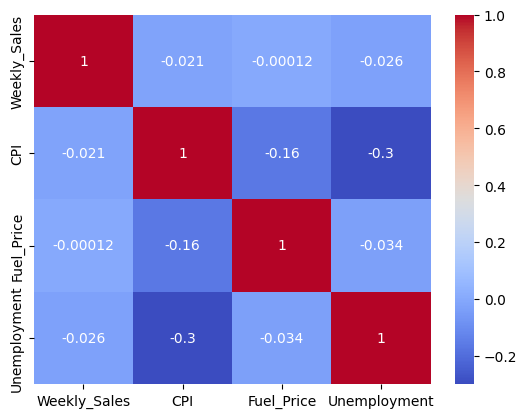

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     227.5
Date:                Sun, 01 Jun 2025   Prob (F-statistic):          1.71e-147
Time:                        10:45:41   Log-Likelihood:            -4.8264e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421566   BIC:                         9.653e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.384e+04    398.858     59.780   

In [10]:
# Correlation Heatmap
sns.heatmap(data[['Weekly_Sales', 'CPI', 'Fuel_Price', 'Unemployment']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Regression analysis
model = smf.ols('Weekly_Sales ~ CPI + Fuel_Price + Unemployment', data=data).fit()
print(model.summary())


**PERSONALIZATION**

In [11]:
for segment in store_summary['Segment'].unique():
    print(f"Segment {segment}: Tailored promotions for this segment based on sales and markdown trends.")


Segment 2: Tailored promotions for this segment based on sales and markdown trends.
Segment 1: Tailored promotions for this segment based on sales and markdown trends.
Segment 0: Tailored promotions for this segment based on sales and markdown trends.


**Segmentation Quality Evaluation**

In [12]:
sil_score = silhouette_score(X_scaled, store_summary['Segment'])
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.28
